This step is to conduct logistic regression model. 

# Import modules

In [1]:
import numpy as np
import pandas as pd

  #heatmap packages
import matplotlib.pyplot as plt
import seaborn as sns

  #logistic model pakcages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Define function

In [2]:
def logi_confmatrix(df, dependent_var):
    '''split data set, 
    run logistic regression model, 
    show coeficient & intercept in the predictive model,
    and finally displace confusion matrix.'''
    #split data
    y=df[dependent_var]
    x=df.iloc[:,1:]
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
    #logistic regression model
    log_reg = LogisticRegression(max_iter=3000)
    lr=log_reg.fit(x_train,y_train)
    #show Coeficient and Intercept
    print('The coeficient for predictive model is:')
    print(lr.coef_)
    print('                           ')
    print('The intercept for predictive model is:')
    print(lr.intercept_)
    #prediction
    y_pred = lr.predict(x_test)
    #displace confusion matrix
    print('                           ')
    print('In the confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('It is concluded that:')
    print('True - positive: '+ str(confusion_matrix(y_test, y_pred)[0][0])+' (upper-left) number of survivals is predicted correctly;')
    print('True - negative: '+ str(confusion_matrix(y_test, y_pred)[0][1])+' (lower-right) number of deaths is predicted correctly;')
    print('False - positive: '+ str(confusion_matrix(y_test, y_pred)[1][0])+' (top-right) number of survivals is predicted wrongly;')
    print('False - negative: '+ str(confusion_matrix(y_test, y_pred)[1][1])+' (lower-left) number of deaths is predicted wrongly.')
    print('                           ')
    print('sensitivity = true positive/(true positive + false negative) = ' + str(round(confusion_matrix(y_test, y_pred)[0][0]/(confusion_matrix(y_test, y_pred)[0][0]+confusion_matrix(y_test, y_pred)[1][1])*100,2))+'%')
    print('specificity = true negative/(true negative + false positive) = ' + str(round(confusion_matrix(y_test, y_pred)[0][1]/(confusion_matrix(y_test, y_pred)[0][1]+confusion_matrix(y_test, y_pred)[1][0])*100,2))+'%')


# Import data

In [3]:
train_df_imputed=pd.read_csv('train_df_imputed.csv',index_col=0)

In [4]:
train_df_imputed.head()

,hospital_death,elective_surgery,age,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,d1_diasbp_min,d1_mbp_min,d1_sysbp_min,h1_diasbp_noninvasive_min,h1_mbp_min,h1_sysbp_min,d1_calcium_min,albumin_apache
0,0,0,68.0,3.000000,6.000000,4.000000,37.0,46.0,73.0,63.000000,85.0,115.0,7.400000,2.300000
1,0,0,77.0,1.000000,3.000000,1.000000,31.0,38.0,67.0,48.000000,57.0,71.0,8.000000,2.902968
2,0,0,25.0,3.000000,6.000000,5.000000,48.0,68.0,105.0,58.000000,83.0,124.0,8.179575,2.902968
3,0,1,81.0,4.000000,6.000000,5.000000,42.0,84.0,84.0,63.270616,71.0,106.0,8.179575,2.902968
4,0,0,19.0,3.465049,5.471195,3.994778,57.0,90.0,120.0,68.000000,92.0,120.0,8.179575,2.902968


# Exploratory analysis on the new data set

In [5]:
train_df_imputed.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91713 entries, 0 to 91712
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hospital_death             91713 non-null  int64  
 1   elective_surgery           91713 non-null  int64  
 2   age                        91713 non-null  float64
 3   gcs_eyes_apache            91713 non-null  float64
 4   gcs_motor_apache           91713 non-null  float64
 5   gcs_verbal_apache          91713 non-null  float64
 6   d1_diasbp_min              91713 non-null  float64
 7   d1_mbp_min                 91713 non-null  float64
 8   d1_sysbp_min               91713 non-null  float64
 9   h1_diasbp_noninvasive_min  91713 non-null  float64
 10  h1_mbp_min                 91713 non-null  float64
 11  h1_sysbp_min               91713 non-null  float64
 12  d1_calcium_min             91713 non-null  float64
 13  albumin_apache             91713 non-null  flo

In [6]:
train_df_imputed.describe()

,hospital_death,elective_surgery,age,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,d1_diasbp_min,d1_mbp_min,d1_sysbp_min,h1_diasbp_noninvasive_min,h1_mbp_min,h1_sysbp_min,d1_calcium_min,albumin_apache
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,0.086302,0.183736,62.309516,3.465049,5.471195,3.994778,50.161314,64.871859,96.923870,63.270616,79.400028,116.362296,8.179575,2.902968
std,0.280811,0.387271,16.383883,0.941800,1.274954,1.543912,13.305601,15.660862,20.659998,15.750273,18.640477,25.983491,0.725613,0.435041
min,0.000000,0.000000,16.000000,1.000000,1.000000,1.000000,13.000000,22.000000,41.000000,22.000000,32.000000,53.000000,5.500000,1.200000
25%,0.000000,0.000000,53.000000,3.000000,6.000000,3.994778,42.000000,55.000000,84.000000,53.000000,67.000000,98.000000,7.800000,2.902968
50%,0.000000,0.000000,64.000000,4.000000,6.000000,5.000000,50.000000,64.000000,96.000000,63.270616,79.400028,116.000000,8.179575,2.902968
75%,0.000000,0.000000,75.000000,4.000000,6.000000,5.000000,58.000000,75.000000,110.000000,73.000000,91.000000,133.000000,8.600000,2.902968
max,1.000000,1.000000,89.000000,4.000000,6.000000,5.000000,90.000000,112.000000,160.000000,114.000000,138.000000,194.000000,10.300000,4.600000


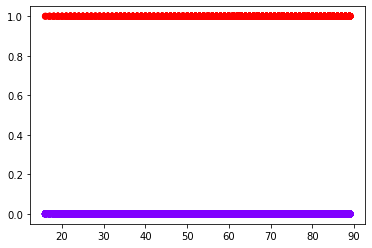

In [7]:
plt.scatter(train_df_imputed.iloc[:,2],train_df_imputed['hospital_death'],c = train_df_imputed['hospital_death'], cmap='rainbow')
plt.show()

# Correlation and heatmap

In [8]:
#correlation matrix
train_df_imputed.corr()

,hospital_death,elective_surgery,age,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,d1_diasbp_min,d1_mbp_min,d1_sysbp_min,h1_diasbp_noninvasive_min,h1_mbp_min,h1_sysbp_min,d1_calcium_min,albumin_apache
hospital_death,1.000000,-0.093574,0.106603,-0.255160,-0.276794,-0.236218,-0.179225,-0.194916,-0.209780,-0.127870,-0.138433,-0.143789,-0.121270,-0.138517
elective_surgery,-0.093574,1.000000,0.066359,0.009754,0.015660,-0.013262,0.007186,0.012444,0.029343,-0.049142,-0.069848,-0.035765,-0.085953,-0.014100
age,0.106603,0.066359,1.000000,0.025742,0.025275,-0.017420,-0.206490,-0.128354,-0.058488,-0.182210,-0.103478,-0.004929,0.042781,-0.074244
gcs_eyes_apache,-0.255160,0.009754,0.025742,1.000000,0.800127,0.779128,0.113739,0.138282,0.165039,0.076786,0.108649,0.126279,0.153049,0.071916
gcs_motor_apache,-0.276794,0.015660,0.025275,0.800127,1.000000,0.699706,0.101760,0.125399,0.156810,0.064614,0.093631,0.115045,0.141300,0.066383
gcs_verbal_apache,-0.236218,-0.013262,-0.017420,0.779128,0.699706,1.000000,0.123403,0.150203,0.174886,0.085306,0.119735,0.133324,0.152098,0.086182
d1_diasbp_min,-0.179225,0.007186,-0.206490,0.113739,0.101760,0.123403,1.000000,0.852638,0.667531,0.605501,0.562736,0.419870,0.189508,0.175956
d1_mbp_min,-0.194916,0.012444,-0.128354,0.138282,0.125399,0.150203,0.852638,1.000000,0.793155,0.549291,0.619455,0.514294,0.224680,0.196107
d1_sysbp_min,-0.209780,0.029343,-0.058488,0.165039,0.156810,0.174886,0.667531,0.793155,1.000000,0.456296,0.548123,0.633968,0.258780,0.202680
h1_diasbp_noninvasive_min,-0.127870,-0.049142,-0.182210,0.076786,0.064614,0.085306,0.605501,0.549291,0.456296,1.000000,0.848191,0.672222,0.204669,0.185484


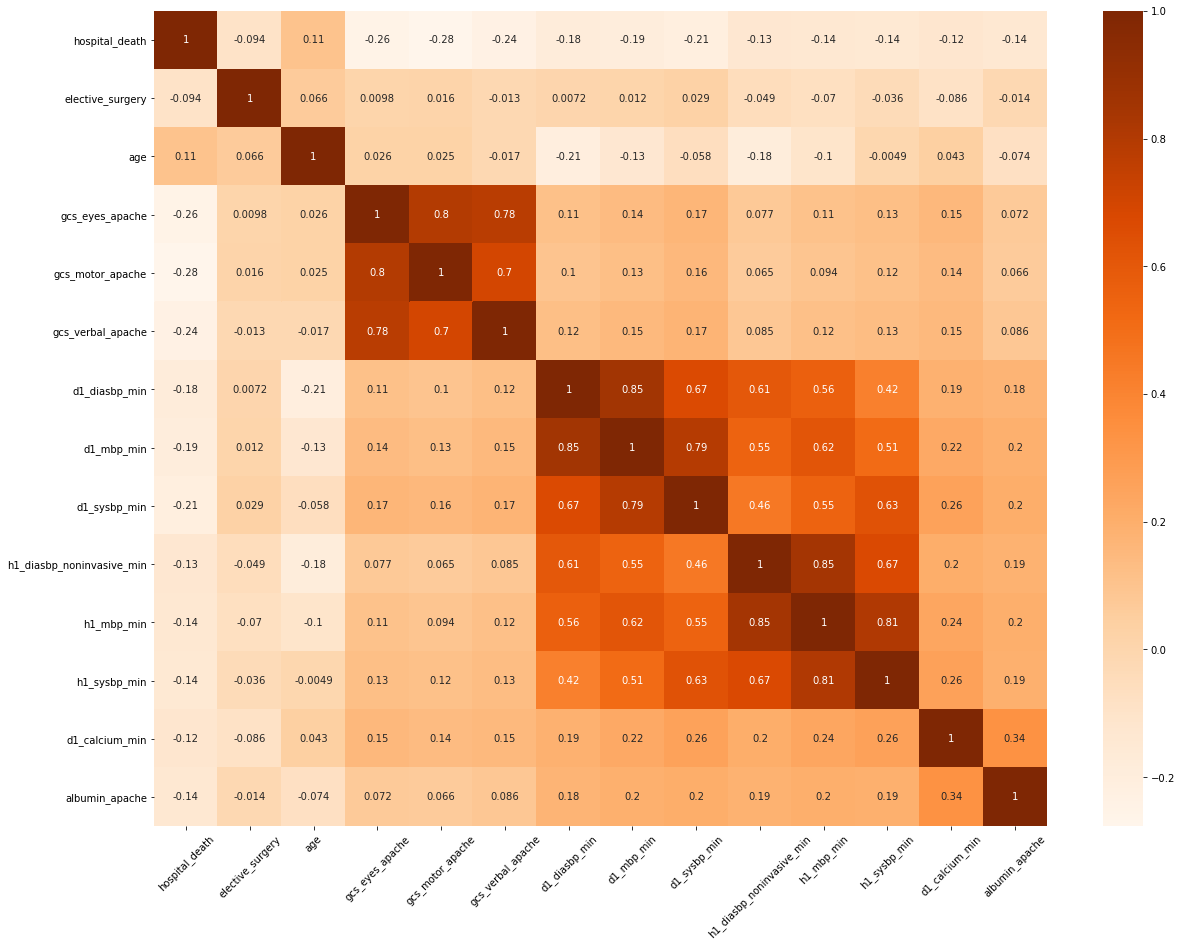

In [9]:
#heatmap - to visualize correlations between selected features and response. 
plt.figure(figsize = (20,15))
sns.heatmap(train_df_imputed.corr(),cmap='Oranges',annot=True)
plt.xticks(rotation=45)
plt.show()


Multicolinearity has reduced after dimensionality reduction. Logistic regression model will be considered here. In the future, supervised-learning model will be conducted as a comparison. 

# Logistic regression model

In [10]:
logi_confmatrix(train_df_imputed, 'hospital_death')

The coeficient for predictive model is:
[[-1.40788499e+00  2.91485537e-02 -1.73808084e-01 -2.49815037e-01
  -1.39634963e-01 -7.81209051e-03 -1.08826295e-02 -1.54764212e-02
   3.72426597e-03  8.91748480e-05 -3.31407679e-03 -1.42989635e-01
  -5.80636066e-01]]
                           
The intercept for predictive model is:
[3.56952373]
                           
In the confusion matrix:
[[20741   181]
 [ 1723   284]]
It is concluded that:
True - positive: 20741 (upper-left) number of survivals is predicted correctly;
True - negative: 181 (lower-right) number of deaths is predicted correctly;
False - positive: 1723 (top-right) number of survivals is predicted wrongly;
False - negative: 284 (lower-left) number of deaths is predicted wrongly.
                           
sensitivity = true positive/(true positive + false negative) = 98.65%
specificity = true negative/(true negative + false positive) = 9.51%


Therefore, this imbalanced data set predict suvivals over 98% correctly, though <10% prediction accuracy is provided for deaths. 

Resampling will be considered. 

# Logistic regression model on resampled data set

In [11]:
# Replicate samples from minority class for 10 times
add_df = train_df_imputed[train_df_imputed['hospital_death'] ==1]
for col in range(1,10):
    add_df=add_df.append(train_df_imputed[train_df_imputed['hospital_death'] ==1],ignore_index=False)

reg_resampled_df=train_df_imputed.append(add_df,ignore_index=True)
reg_resampled_df

,hospital_death,elective_surgery,age,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,d1_diasbp_min,d1_mbp_min,d1_sysbp_min,h1_diasbp_noninvasive_min,h1_mbp_min,h1_sysbp_min,d1_calcium_min,albumin_apache
0,0,0,68.000000,3.000000,6.000000,4.000000,37.0,46.0,73.0,63.000000,85.0,115.0,7.400000,2.300000
1,0,0,77.000000,1.000000,3.000000,1.000000,31.0,38.0,67.0,48.000000,57.0,71.0,8.000000,2.902968
2,0,0,25.000000,3.000000,6.000000,5.000000,48.0,68.0,105.0,58.000000,83.0,124.0,8.179575,2.902968
3,0,1,81.000000,4.000000,6.000000,5.000000,42.0,84.0,84.0,63.270616,71.0,106.0,8.179575,2.902968
4,0,0,19.000000,3.465049,5.471195,3.994778,57.0,90.0,120.0,68.000000,92.0,120.0,8.179575,2.902968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170858,1,0,19.000000,4.000000,6.000000,5.000000,45.0,57.0,84.0,70.000000,75.0,90.0,7.800000,3.100000
170859,1,0,74.000000,2.000000,4.000000,1.000000,29.0,46.0,82.0,63.270616,62.0,99.0,8.100000,2.400000
170860,1,0,62.309516,4.000000,6.000000,5.000000,49.0,58.0,81.0,62.000000,71.0,119.0,9.000000,2.902968
170861,1,0,59.000000,1.000000,1.000000,1.000000,36.0,41.0,59.0,36.000000,41.0,71.0,7.400000,2.902968


In [12]:
logi_confmatrix(reg_resampled_df, 'hospital_death')

The coeficient for predictive model is:
[[-1.34377315  0.03243772 -0.18639002 -0.25684538 -0.15902881 -0.00613425
  -0.00808422 -0.01592524  0.00396604 -0.00210565 -0.00329596 -0.12223558
  -0.61754954]]
                           
The intercept for predictive model is:
[5.77470189]
                           
In the confusion matrix:
[[15791  5280]
 [ 5768 15877]]
It is concluded that:
True - positive: 15791 (upper-left) number of survivals is predicted correctly;
True - negative: 5280 (lower-right) number of deaths is predicted correctly;
False - positive: 5768 (top-right) number of survivals is predicted wrongly;
False - negative: 15877 (lower-left) number of deaths is predicted wrongly.
                           
sensitivity = true positive/(true positive + false negative) = 49.86%
specificity = true negative/(true negative + false positive) = 47.79%


The sensitivity of resampled logistic regression model reduces compared to the original model, though specificity improves.

In total,

logistic regression model is underfitting thus unsuitable for survival rate prediction in the test data set. 

As a comparison, a non-linear model is to be considered. 